In [9]:
import os
import pymysql
from dotenv import load_dotenv
load_dotenv()

HOST = os.getenv('HOST')
USER = os.getenv('MYSQL_USER')
PASSWORD = os.getenv('MYSQL_ROOT_PASSWORD')
DB = os.getenv('MYSQL_DATABASE')

try:
    connection = pymysql.connect(host=HOST, 
                          user = USER,
                         password = PASSWORD,
                         db = DB)

    cursor = connection.cursor()
    print("Connection stablished.")
except:
    print("An exception occurred!")

Connection stablished.


## Creating Dataframe from Sqlite
>Is a good practice to do this way, because I don't need to change the sql, and dataframe provides more features.

>Another question is because I need to define sales period from my database.

In [10]:
import pandas as pd
df = pd.read_sql_query("SELECT * FROM pedidos", connection)
df

,numero,data_pedido,hora_pedido,cliente,endereco,telefone,tipo_entrega,valor_pizza,valor_borda,valor_refrigerante,valor_entrega,valor_total,hora_entrega,tempo
0,1,2011-10-07,18:45:00,Cliente 1,Endereco 1,00-000-0000,Buscar,32.0,0.0,0.0,0.0,32.0,19:15:00,00:30:00
1,2,2011-10-07,18:47:00,Cliente 2,Endereco 2,00-000-0001,Buscar,30.0,0.0,0.0,0.0,30.0,19:30:00,00:43:00
2,3,2011-10-07,18:49:00,Cliente 3,Endereco 3,00-000-0002,Buscar,27.0,0.0,0.0,0.0,27.0,19:31:00,00:42:00
3,4,2011-10-07,18:50:00,Cliente 4,Endereco 4,00-000-0003,Buscar,30.0,0.0,0.0,0.0,30.0,19:30:00,00:40:00
4,5,2011-10-07,18:52:00,Cliente 5,Endereco 5,00-000-0004,Buscar,30.0,0.0,0.0,0.0,30.0,19:15:00,00:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2268,2015-02-03,22:00:00,Cliente 2268,Endereco 2268,00-000-2267,Entrega,28.0,0.0,4.5,2.5,35.0,22:40:00,00:40:00
2268,2269,2015-02-03,22:17:00,Cliente 2269,Endereco 2269,00-000-2268,Buscar,22.0,0.0,0.0,0.0,22.0,23:00:00,00:43:00
2269,2270,2015-02-03,22:44:00,Cliente 2270,Endereco 2270,00-000-2269,Entrega,20.0,0.0,0.0,2.5,22.5,23:30:00,00:46:00
2270,2271,2015-02-03,22:54:00,Cliente 2271,Endereco 2271,00-000-2270,Entrega,27.0,0.0,0.0,2.5,27.0,23:24:00,00:30:00


## Attribute Selection
* __Dropping unecessary columns__

In [11]:
df = df.drop(columns=['numero', 'cliente', 'endereco','telefone','valor_pizza', 'valor_entrega','hora_entrega'])
df

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo
0,2011-10-07,18:45:00,Buscar,0.0,0.0,32.0,00:30:00
1,2011-10-07,18:47:00,Buscar,0.0,0.0,30.0,00:43:00
2,2011-10-07,18:49:00,Buscar,0.0,0.0,27.0,00:42:00
3,2011-10-07,18:50:00,Buscar,0.0,0.0,30.0,00:40:00
4,2011-10-07,18:52:00,Buscar,0.0,0.0,30.0,00:23:00
...,...,...,...,...,...,...,...
2267,2015-02-03,22:00:00,Entrega,0.0,4.5,35.0,00:40:00
2268,2015-02-03,22:17:00,Buscar,0.0,0.0,22.0,00:43:00
2269,2015-02-03,22:44:00,Entrega,0.0,0.0,22.5,00:46:00
2270,2015-02-03,22:54:00,Entrega,0.0,0.0,27.0,00:30:00


## Getting the day name from data_pedido

In [12]:
import datetime
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
week_day = []
for i in df['data_pedido']:
    week_day.append(day_name[datetime.datetime.strptime(str(i),'%Y-%m-%d').weekday()])

In [13]:
week_day[:5], week_day[-5:]

(['Friday', 'Friday', 'Friday', 'Friday', 'Friday'],
 ['Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday'])

In [14]:
df['dia_da_semana'] = week_day

In [15]:
df

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo,dia_da_semana
0,2011-10-07,18:45:00,Buscar,0.0,0.0,32.0,00:30:00,Friday
1,2011-10-07,18:47:00,Buscar,0.0,0.0,30.0,00:43:00,Friday
2,2011-10-07,18:49:00,Buscar,0.0,0.0,27.0,00:42:00,Friday
3,2011-10-07,18:50:00,Buscar,0.0,0.0,30.0,00:40:00,Friday
4,2011-10-07,18:52:00,Buscar,0.0,0.0,30.0,00:23:00,Friday
...,...,...,...,...,...,...,...,...
2267,2015-02-03,22:00:00,Entrega,0.0,4.5,35.0,00:40:00,Tuesday
2268,2015-02-03,22:17:00,Buscar,0.0,0.0,22.0,00:43:00,Tuesday
2269,2015-02-03,22:44:00,Entrega,0.0,0.0,22.5,00:46:00,Tuesday
2270,2015-02-03,22:54:00,Entrega,0.0,0.0,27.0,00:30:00,Tuesday


## Ranking the sales period

In [16]:
def give_period(el):
    """Must return a period from time(el)"""
    if el < '20:00:00':
        return('Start')
    
    elif el >= '20:00:00' and el < '22:00:00':
        return('Maximum')
    
    elif el >= '22:00:00':
        return('End')
    return('Is not working')#this return is going to never be called 

give_period('20:40:00')

'Maximum'

In [17]:
#Returning the day sales period from df['hora_pedido'] 
sales_period =[]
for i in range(len(df['hora_pedido'])):
    #print(give_period(df.iloc[i,2]))
    sales_period.append(give_period(df.iloc[i,2]))

In [18]:
df['periodo_de_vendas'] = sales_period

In [19]:
df

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo,dia_da_semana,periodo_de_vendas
0,2011-10-07,18:45:00,Buscar,0.0,0.0,32.0,00:30:00,Friday,End
1,2011-10-07,18:47:00,Buscar,0.0,0.0,30.0,00:43:00,Friday,End
2,2011-10-07,18:49:00,Buscar,0.0,0.0,27.0,00:42:00,Friday,End
3,2011-10-07,18:50:00,Buscar,0.0,0.0,30.0,00:40:00,Friday,End
4,2011-10-07,18:52:00,Buscar,0.0,0.0,30.0,00:23:00,Friday,End
...,...,...,...,...,...,...,...,...,...
2267,2015-02-03,22:00:00,Entrega,0.0,4.5,35.0,00:40:00,Tuesday,End
2268,2015-02-03,22:17:00,Buscar,0.0,0.0,22.0,00:43:00,Tuesday,End
2269,2015-02-03,22:44:00,Entrega,0.0,0.0,22.5,00:46:00,Tuesday,End
2270,2015-02-03,22:54:00,Entrega,0.0,0.0,27.0,00:30:00,Tuesday,End


## Removing the rows where data_pedido >= 2015

In [20]:
for index, row in df.iterrows():
    if int(str(row['data_pedido'])[0:4]) >= 2015:
        df.drop(index, inplace=True)
df

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo,dia_da_semana,periodo_de_vendas
0,2011-10-07,18:45:00,Buscar,0.0,0.0,32.0,00:30:00,Friday,End
1,2011-10-07,18:47:00,Buscar,0.0,0.0,30.0,00:43:00,Friday,End
2,2011-10-07,18:49:00,Buscar,0.0,0.0,27.0,00:42:00,Friday,End
3,2011-10-07,18:50:00,Buscar,0.0,0.0,30.0,00:40:00,Friday,End
4,2011-10-07,18:52:00,Buscar,0.0,0.0,30.0,00:23:00,Friday,End
...,...,...,...,...,...,...,...,...,...
2239,2012-02-24,20:15:00,Entrega,0.0,0.0,27.0,00:43:00,Friday,End
2240,2012-02-24,20:20:00,Entrega,0.0,0.0,30.0,00:54:00,Friday,End
2241,2012-02-24,20:47:00,Entrega,0.0,0.0,34.5,00:34:00,Friday,End
2242,2012-02-24,21:25:00,Buscar,0.0,0.0,31.0,00:24:00,Friday,End


In [21]:
df['data_pedido'][0:5]
for i in range(len(df['data_pedido'])):
    if int(str(df['data_pedido'])[0:4]) >= 2015:
        print(df['data_pedido'])
"""Must return nothing"""

'Must return nothing'

## The Pizza Edge
>I must to define the pizza edge value as boolean, not as edge value(valor_borda) currency.

In [22]:
def give_boolean(df_column):
    """Must return 'false' for 0 value and 'true' for any other"""
    if df_column != 0:
        return('True')
    else:
        return('False')

In [23]:
#building another column  
borda = []
for i in range(len(df['hora_pedido'])):
    borda.append(give_boolean(df.iloc[i,3]))

In [61]:
borda[6:8]

['True', 'False']

In [24]:
df['borda'] = borda

In [25]:
df

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo,dia_da_semana,periodo_de_vendas,borda
0,2011-10-07,18:45:00,Buscar,0.0,0.0,32.0,00:30:00,Friday,End,False
1,2011-10-07,18:47:00,Buscar,0.0,0.0,30.0,00:43:00,Friday,End,False
2,2011-10-07,18:49:00,Buscar,0.0,0.0,27.0,00:42:00,Friday,End,False
3,2011-10-07,18:50:00,Buscar,0.0,0.0,30.0,00:40:00,Friday,End,False
4,2011-10-07,18:52:00,Buscar,0.0,0.0,30.0,00:23:00,Friday,End,False
...,...,...,...,...,...,...,...,...,...,...
2239,2012-02-24,20:15:00,Entrega,0.0,0.0,27.0,00:43:00,Friday,End,False
2240,2012-02-24,20:20:00,Entrega,0.0,0.0,30.0,00:54:00,Friday,End,False
2241,2012-02-24,20:47:00,Entrega,0.0,0.0,34.5,00:34:00,Friday,End,False
2242,2012-02-24,21:25:00,Buscar,0.0,0.0,31.0,00:24:00,Friday,End,False


In [26]:
df.iloc[6,:], df.iloc[7,:]

(data_pedido                2011-10-07
 hora_pedido           0 days 18:59:00
 tipo_entrega                   Buscar
 valor_borda                       2.5
 valor_refrigerante                  0
 valor_total                      30.5
 tempo                 0 days 00:21:00
 dia_da_semana                  Friday
 periodo_de_vendas                 End
 borda                            True
 Name: 6, dtype: object,
 data_pedido                2011-10-07
 hora_pedido           0 days 20:00:00
 tipo_entrega                  Entrega
 valor_borda                         0
 valor_refrigerante                4.5
 valor_total                        35
 tempo                 0 days 00:32:00
 dia_da_semana                  Friday
 periodo_de_vendas                 End
 borda                           False
 Name: 7, dtype: object)

In [27]:
print(False in df['borda'])
print(True in df['borda'])

True
True


## Soda
>The same process as pizza edge.

In [28]:
#building another column  
refrigerante = []
for i in range(len(df['hora_pedido'])):
    refrigerante.append(give_boolean(df.iloc[i,4]))

In [29]:
df['refrigerante'] = refrigerante

In [30]:
#Analysing values where valor_refrigerante != and valor_borda != 0, and vice versa
df.iloc[6,:], df.iloc[7,:]

(data_pedido                2011-10-07
 hora_pedido           0 days 18:59:00
 tipo_entrega                   Buscar
 valor_borda                       2.5
 valor_refrigerante                  0
 valor_total                      30.5
 tempo                 0 days 00:21:00
 dia_da_semana                  Friday
 periodo_de_vendas                 End
 borda                            True
 refrigerante                    False
 Name: 6, dtype: object,
 data_pedido                2011-10-07
 hora_pedido           0 days 20:00:00
 tipo_entrega                  Entrega
 valor_borda                         0
 valor_refrigerante                4.5
 valor_total                        35
 tempo                 0 days 00:32:00
 dia_da_semana                  Friday
 periodo_de_vendas                 End
 borda                           False
 refrigerante                     True
 Name: 7, dtype: object)

In [31]:
print(False in df['refrigerante'])
print(True in df['refrigerante'])
print(None in df['refrigerante'])

True
True
False


## Exporting preprocessed Data
>This way I can use this data in a future

In [60]:
try:
    df.to_csv('source/pre_processed.csv', index=False, date_format='%Y-%m-%d %H:%M:%S')
    print('CSV file has been created!')
except:
    print('An exception occurred!')

CSV file has been created!


## Frequency Distribution
>As we have a large number of distinct values from valor_total, we need to improve this value to reach better rules.

In [59]:
df

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo,dia_da_semana,periodo_de_vendas,borda,refrigerante
0,2011-10-07,18:45:00,Buscar,0.0,0.0,32.0,00:30:00,Friday,End,False,False
1,2011-10-07,18:47:00,Buscar,0.0,0.0,30.0,00:43:00,Friday,End,False,False
2,2011-10-07,18:49:00,Buscar,0.0,0.0,27.0,00:42:00,Friday,End,False,False
3,2011-10-07,18:50:00,Buscar,0.0,0.0,30.0,00:40:00,Friday,End,False,False
4,2011-10-07,18:52:00,Buscar,0.0,0.0,30.0,00:23:00,Friday,End,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2239,2012-02-24,20:15:00,Entrega,0.0,0.0,27.0,00:43:00,Friday,End,False,False
2240,2012-02-24,20:20:00,Entrega,0.0,0.0,30.0,00:54:00,Friday,End,False,False
2241,2012-02-24,20:47:00,Entrega,0.0,0.0,34.5,00:34:00,Friday,End,False,False
2242,2012-02-24,21:25:00,Buscar,0.0,0.0,31.0,00:24:00,Friday,End,False,False


In [36]:
df.valor_total.unique(),len(df.valor_total.unique())

(array([32.  , 30.  , 27.  , 30.5 , 35.  , 23.  , 25.5 , 19.5 , 20.5 ,
        34.5 , 17.5 , 31.  , 37.  , 28.  , 12.  , 32.5 , 22.  , 23.5 ,
        34.  , 28.5 , 21.5 , 33.5 , 39.  , 29.5 , 36.  , 24.5 , 22.5 ,
        20.  , 25.  , 18.  , 41.5 , 26.  , 19.  , 38.  , 14.  , 14.5 ,
        10.  , 18.5 , 11.5 , 15.  , 21.  , 29.  , 28.25, 17.  , 35.5 ,
        33.  , 36.5 , 24.  , 40.  , 26.5 , 41.  , 38.5 , 27.5 , 20.8 ,
        35.75, 31.5 , 40.5 , 43.  , 39.5 , 37.5 , 45.  , 43.5 , 42.5 ,
        42.  , 47.5 , 44.  , 50.  , 45.5 ]),
 68)

>We have 68 unique values and we don't have the same different between each value. In this way is difficult to get a rule.

In [48]:
#The frequency of each value from valor_total
df.groupby(['valor_total']).size()

valor_total
10.0    2
11.5    2
12.0    7
14.0    2
14.5    2
       ..
44.0    6
45.0    2
45.5    1
47.5    1
50.0    2
Length: 68, dtype: int64

## Using Matplotlib
* I am going to use matplotlib to this automatically and in a visual way.
>I need to solve the issue with the time format in the exported csv, because this section is better to stay in another notebook.

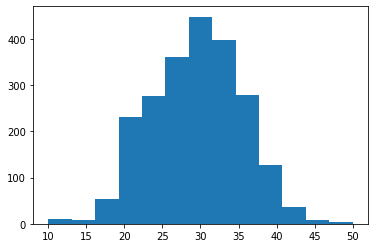

In [69]:
#Getting the plot of histogram
import matplotlib.pyplot as plt
from numpy import genfromtxt

histogram = plt.hist(df['valor_total'], bins='sturges')

In [74]:
#Analysing the intervals
print(histogram[1])

[10.         13.07692308 16.15384615 19.23076923 22.30769231 25.38461538
 28.46153846 31.53846154 34.61538462 37.69230769 40.76923077 43.84615385
 46.92307692 50.        ]


In [75]:
for i in range(len(histogram[1])):
    print(histogram[1][i])

10.0
13.076923076923077
16.153846153846153
19.230769230769234
22.307692307692307
25.384615384615387
28.461538461538463
31.53846153846154
34.61538461538461
37.69230769230769
40.769230769230774
43.84615384615385
46.92307692307693
50.0
